## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question no 1

## Load data

In [2]:
data = pd.read_excel('Data.xlsx', header=None)
data.columns = ['A1', 'A2', 'A3', 'A4']
X = data.values

## Calculate Distance

In [3]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

## K-means Clustering

In [4]:
def kmeans(X, K):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    for _ in range(100):  # max iterations
        # Assign clusters
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            clusters[np.argmin(distances)].append(x)
        
        # Recalculate centroids
        new_centroids = [np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i]
                         for i, cluster in enumerate(clusters)]
        if all(np.allclose(centroids[i], new_centroids[i]) for i in range(K)):
            break
        centroids = new_centroids

    # Convert clusters into labels for silhouette score calculation
    labels = np.zeros(X.shape[0], dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = cluster_id
    return centroids, clusters, labels

# Visualization function for K-means
def plot_kmeans(centroids, clusters):
    colors = ['orange', 'red', 'purple', 'green']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], s=30, color=colors[i % len(colors)], label=f'Cluster {i}')
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=200, color='black', marker='x', label='Centroids')
    plt.xlabel('A1')
    plt.ylabel('A2')
    plt.legend()
    plt.title("K-means Clustering")
    plt.show()


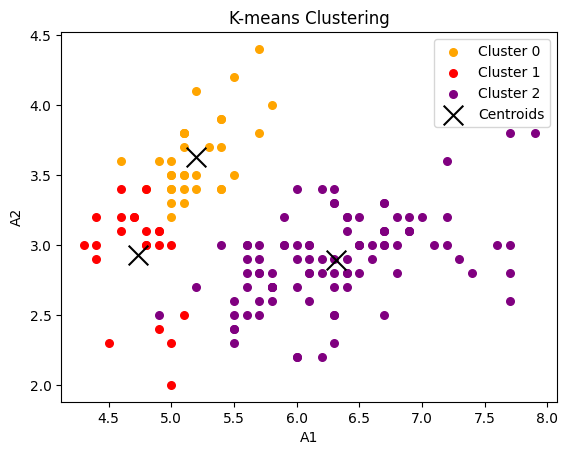

In [5]:
# Get user input for K
K = int(input("Enter the number of clusters for k-means: "))

# Run K-means and plot
centroids, clusters, labels_kmeans = kmeans(X, K)

# Plot the results
plot_kmeans(centroids, clusters)

## K-medoid Clsutering

In [6]:
def kmedoids(X, K):
    # Randomly initialize medoids
    medoids = X[np.random.choice(X.shape[0], K, replace=False)]
    for _ in range(100):  # max iterations
        # Assign clusters
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [euclidean_distance(x, medoid) for medoid in medoids]
            clusters[np.argmin(distances)].append(x)
        
        # Recalculate medoids
        new_medoids = []
        for cluster in clusters:
            if len(cluster) > 0:
                medoid = cluster[np.argmin([np.sum(euclidean_distance(point, other) for other in cluster) for point in cluster])]
                new_medoids.append(medoid)
            else:
                new_medoids.append(medoids[len(new_medoids)])
        if all(np.array_equal(medoids[i], new_medoids[i]) for i in range(K)):
            break
        medoids = new_medoids

    # Convert clusters into labels for silhouette score calculation
    labels = np.zeros(X.shape[0], dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = cluster_id
    return medoids, clusters, labels

# Visualization function for K-medoids
def plot_kmedoids(medoids, clusters):
    colors = ['orange', 'red', 'purple', 'green']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], s=30, color=colors[i % len(colors)], label=f'Cluster {i}')
    plt.scatter(np.array(medoids)[:, 0], np.array(medoids)[:, 1], s=200, color='black', marker='x', label='Medoids')
    plt.xlabel('A1')
    plt.ylabel('A2')
    plt.legend()
    plt.title("K-medoids Clustering")
    plt.show()

C:\Users\Fatimah\AppData\Local\Temp\ipykernel_10688\2582780659.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  medoid = cluster[np.argmin([np.sum(euclidean_distance(point, other) for other in cluster) for point in cluster])]


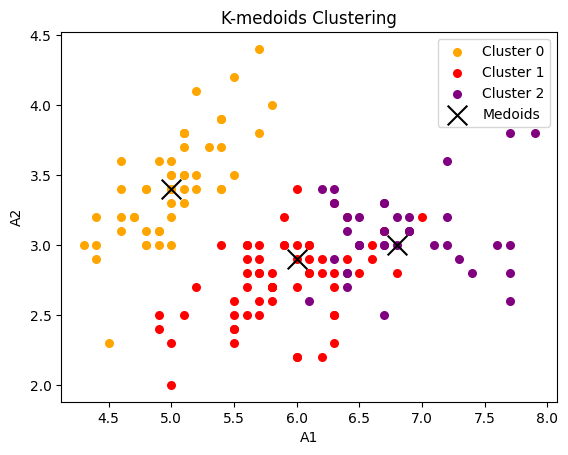

In [7]:
# Get user input for K
K = int(input("Enter the number of clusters for k-medoid: "))
# Run K-medoids and plot
medoids, clusters, labels_kmedoids = kmedoids(X, K)

# Plot the results
plot_kmedoids(medoids, clusters)

## K-median Clustering

In [8]:
# K-median Clustering
def kmedian(X, K):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    for _ in range(100):  # max iterations
        # Assign clusters
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            clusters[np.argmin(distances)].append(x)
        
        # Recalculate centroids (medians)
        new_centroids = [np.median(cluster, axis=0) if len(cluster) > 0 else centroids[i]
                         for i, cluster in enumerate(clusters)]
        if all(np.allclose(centroids[i], new_centroids[i]) for i in range(K)):
            break
        centroids = new_centroids

    # Generate labels based on clusters for silhouette score calculation
    labels = np.zeros(X.shape[0], dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = cluster_id
    return centroids, clusters, labels

# Visualization function for K-median
def plot_kmedian(centroids, clusters):
    colors = ['orange', 'red', 'purple', 'green']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], s=30, color=colors[i % len(colors)], label=f'Cluster {i}')
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=200, color='black', marker='x', label='Centroids')
    plt.xlabel('A1')
    plt.ylabel('A2')
    plt.legend()
    plt.title("K-median Clustering")
    plt.show()

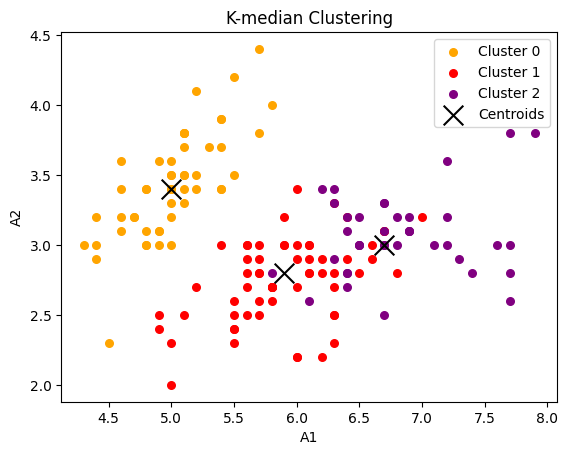

In [9]:
# Get user input for K
K = int(input("Enter the number of clusters for k-median: "))

# Run K-median and plot
centroids, clusters, labels_kmedian = kmedian(X, K)
plot_kmedian(centroids, clusters)

## Silhouette Score

In [10]:
import numpy as np

# Assuming euclidean_distance and manhattan_distance are already defined as in the notebook

def silhouette_score(X, labels, metric='euclidean'):
    # Select appropriate distance function
    if metric == 'manhattan':
        calculate_distance = manhattan_distance
    elif metric == 'euclidean':
        calculate_distance = euclidean_distance
    else:
        raise ValueError("Unsupported metric. Use 'euclidean' or 'manhattan'.")

    silhouette_scores = []
    unique_labels = np.unique(labels)

    for i, point in enumerate(X):
        # Points in the same cluster
        same_cluster = X[labels == labels[i]]
        # Points in other clusters
        other_clusters = [X[labels == lbl] for lbl in unique_labels if lbl != labels[i]]

        # Mean intra-cluster distance (a)
        a = np.mean([calculate_distance(point, other) for other in same_cluster if not np.array_equal(point, other)]) \
            if len(same_cluster) > 1 else 0

        # Mean nearest-cluster distance (b)
        b = np.min([np.mean([calculate_distance(point, other) for other in cluster]) 
                    for cluster in other_clusters]) if other_clusters else 0

        # Calculate silhouette score for this point
        score = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_scores.append(score)

    return np.mean(silhouette_scores)


silhouette_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')
print(f"K-means Silhouette Score: {silhouette_kmeans:.4f}")

silhouette_kmedian = silhouette_score(X, labels_kmedian, metric='manhattan')
print(f"K-median Silhouette Score: {silhouette_kmedian:.4f}")

silhouette_kmedoids = silhouette_score(X, labels_kmedoids, metric='euclidean')
print(f"K-medoids Silhouette Score: {silhouette_kmedoids:.4f}")


K-means Silhouette Score: 0.4984
K-median Silhouette Score: 0.5456
K-medoids Silhouette Score: 0.5398


# Question 2

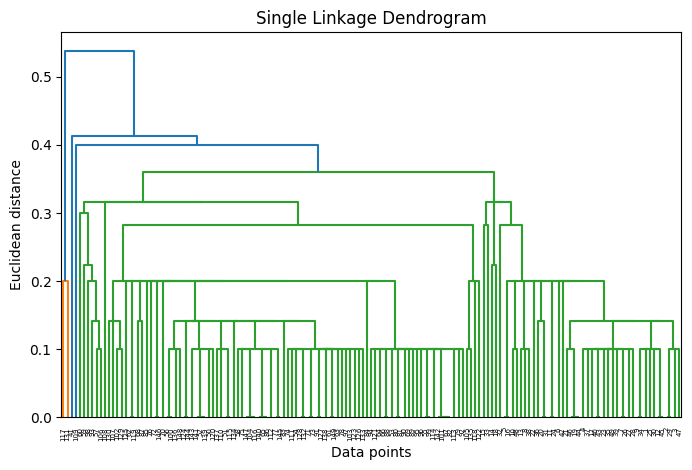

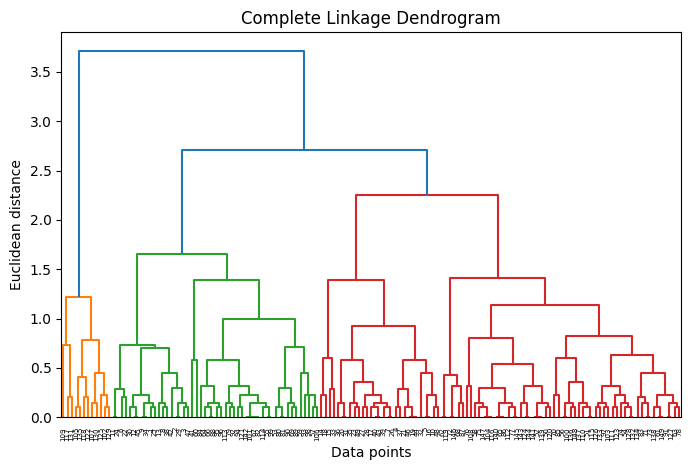

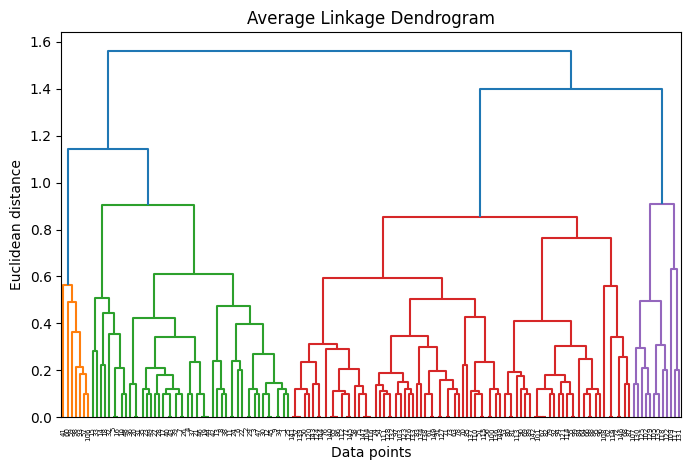

C:\Users\Fatimah\AppData\Local\Temp\ipykernel_10688\1992633467.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_clusters))


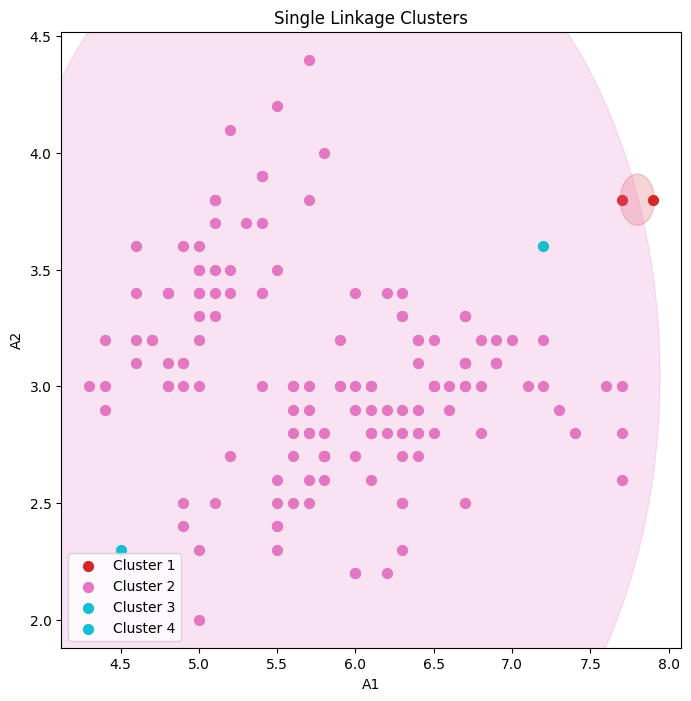

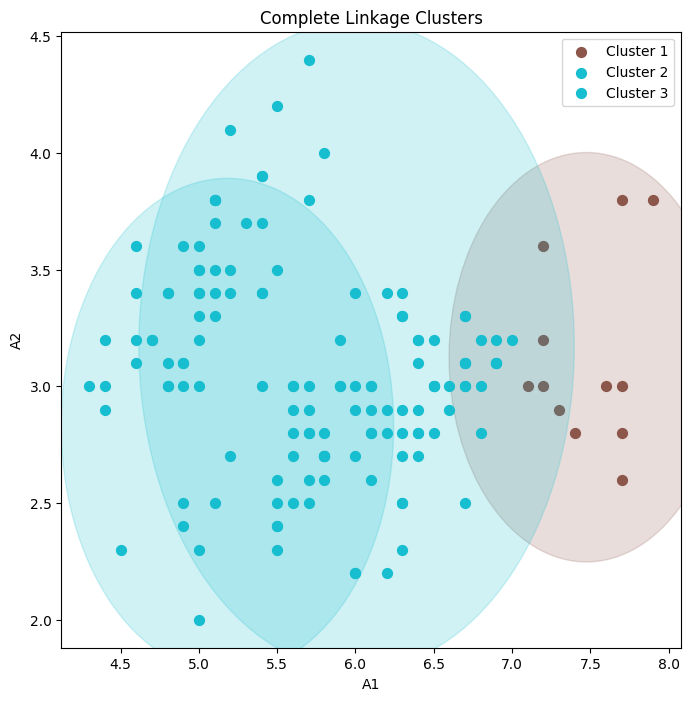

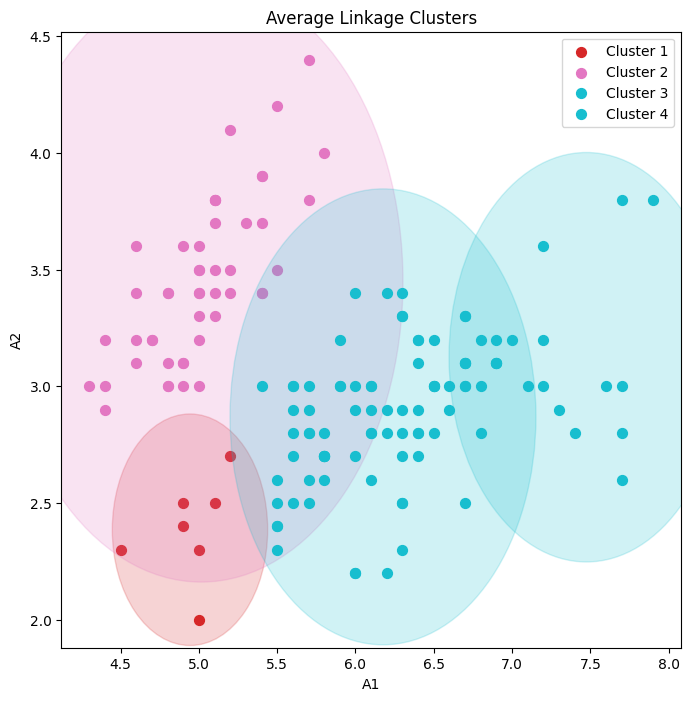

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


file_path = 'Data.xlsx'  
data = pd.read_excel(file_path)
data.columns = ['A1', 'A2', 'A3', 'A4']
data_values = data[['A1', 'A2']].to_numpy()  

linkage_methods = ['single', 'complete', 'average']
linkages = {method: linkage(data_values, method=method) for method in linkage_methods}

def plot_dendrogram(linkage_matrix, title):
    plt.figure(figsize=(8, 5))
    dendrogram(linkage_matrix, labels=np.arange(len(data_values)) + 1)
    plt.title(title)
    plt.xlabel('Data points')
    plt.ylabel('Euclidean distance')
    plt.show()

for method, link_matrix in linkages.items():
    plot_dendrogram(link_matrix, f"{method.capitalize()} Linkage Dendrogram")

def plot_clusters_with_circles(data, linkage_matrix, title, max_distance=None):
    plt.figure(figsize=(8, 8))
    
    if max_distance is None:
        max_distance = 0.7 * max(linkage_matrix[:, 2])  # Adjust this multiplier as needed

    clusters = fcluster(linkage_matrix, max_distance, criterion='distance')
    unique_clusters = np.unique(clusters)
    colors = plt.cm.get_cmap("tab10", len(unique_clusters)) 

    for cluster_id in unique_clusters:
        cluster_points = data[clusters == cluster_id]
        mean = cluster_points.mean(axis=0)
        radius = np.linalg.norm(cluster_points - mean, axis=1).max()
        
        # Plot the points for this cluster
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}",
                    color=colors(cluster_id % 10), s=50)
        
        circle = plt.Circle(mean, radius * 1.1, color=colors(cluster_id % 10), alpha=0.2, fill=True)
        plt.gca().add_artist(circle)

    plt.title(title)
    plt.xlabel("A1")
    plt.ylabel("A2")
    plt.legend()
    plt.show()


for method, link_matrix in linkages.items():
    plot_clusters_with_circles(data_values, link_matrix, f"{method.capitalize()} Linkage Clusters", max_distance=0.7 * max(link_matrix[:, 2]))
